# 21/10/2020

## Registration

### Objectives
* ...

In [ ]:
import numpy as np
import skimage.io as io
import skimage.transform as tr
import matplotlib.pyplot as plt

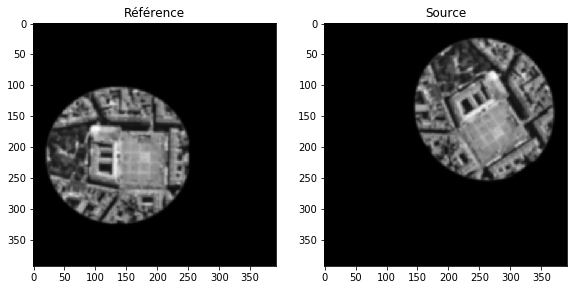

In [143]:
# Images

# http://www.cnes-csg.fr/web/CNES-en/9844-gp-first-pleiades-satellite-to-launch-16-december.php

f = io.imread("capitole1.jpg")
g = io.imread("capitole2.jpg")
(M, N) = f.shape

f = f/255
g = g/255

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.imshow(f, "gray")
plt.title("Référence")
plt.subplot(1,4,2)
plt.imshow(g, "gray")
plt.title("Source")
plt.show()

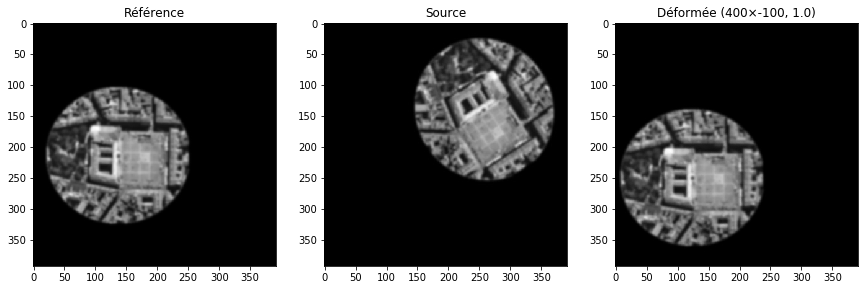

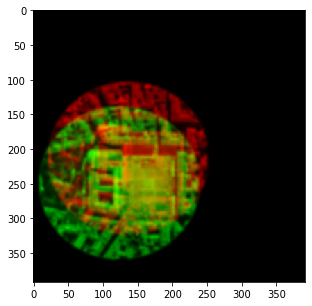

In [159]:
# Transformation test
# Attention, la rotation se fait autour du pixel (0,0)
# A Euclidean transformation, also called rigid transformation, preserves the Euclidean distance between pairs of points.
# It can be described as a rotation about the origin followed by a translation.
# Les axes sont subissent également la rotation, de sorte que la translation se fait suivant les axes tranformés.

x, y, t = 400, -100, 1.#np.pi/3
trans = tr.EuclideanTransform(translation=(x,y), rotation=t)
h = tr.warp(g, trans)

# Affichage
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.imshow(f, "gray")
plt.title("Référence")
plt.subplot(1,4,2)
plt.imshow(g, "gray")
plt.title("Source")
plt.subplot(1,4,3)
plt.imshow(h, "gray")
plt.title(f"Déformée ({x}×{y}, {t:.3})")
plt.show()

# Composition colorée
c = np.zeros((M, N, 3))
c[:,:,0] = f
c[:,:,1] = h
plt.figure(figsize=(5,5))
plt.imshow(c)
plt.show()

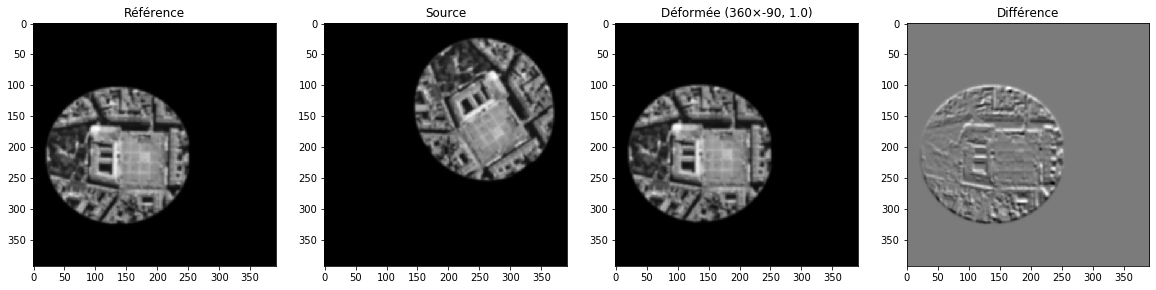

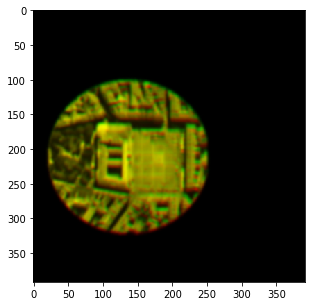

In [158]:
# Recherche de la meilleure transformation (sur une grille)

eqmmin = np.inf

for x in np.arange(300, 400, 10):
    for y in np.arange(-150, -50, 10):
        for t in np.arange(0, 6.5, 1.):
            
            # Transformation
            trans = tr.EuclideanTransform(translation=(x,y), rotation=t)
            h = tr.warp(g, trans)
            
            # EQM
            eqm = np.linalg.norm(f-h)**2/(M*N)
            if eqm < eqmmin:
                eqmmin = eqm
                xopt = x
                yopt = y
                topt = t

# Recalage estimé
trans = tr.EuclideanTransform(translation=(xopt,yopt), rotation=topt)
hopt = tr.warp(g, trans)

# Affichage
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.imshow(f, "gray")
plt.title("Référence")
plt.subplot(1,4,2)
plt.imshow(g, "gray")
plt.title("Source")
plt.subplot(1,4,3)
plt.imshow(hopt, "gray")
plt.title(f"Déformée ({xopt}×{yopt}, {topt:.3})")
plt.subplot(1,4,4)
plt.imshow(hopt-f, "gray")
plt.title("Différence")
plt.show()

# Composition colorée
c = np.zeros((M, N, 3))
c[:,:,0] = f
c[:,:,1] = hopt
plt.figure(figsize=(5,5))
plt.imshow(c)
plt.show()